# Exercise: Predicting Customer Churn with a Neural Network

You are provided with a real-world dataset from a telecom company that includes information about their customers, such as services signed up for, contract type, and payment behavior. Your task is to build a simple neural network to predict whether a customer will churn (i.e., leave the company) or not.

## Task
Build, train, and evaluate a neural network that predicts whether a customer has churned (`Churn` = Yes) or not (`Churn` = No), based on the other available features in the dataset.

1. **Drop irrelevant columns**, which have no numerical meaning.
2. **Convert columns** to numeric. There may be non-numeric entries; handle them appropriately (e.g. by coercing errors and dropping missing values).
3. **Convert the target column** from categorical ("Yes"/"No") to binary (1/0).
4. **Encode categorical features** using the `get_dummies`-function.
5. **Prepare your data** before you feed it into your model.
6. **Build a neural network** using Keras (e.g., with 1–3 layers) to predict churn.
7. **Compile your model** with an appropriate loss function and optimizer.
8. **Train your model** on the training data. 
9. **Evaluate the performance** of your model on the test set and report the test accuracy.

In [15]:
import pandas as pd

df = pd.read_csv("Telco-Customer-Churn.csv")

In [16]:
#1.
df = df.drop(columns=['customerID'])

In [17]:
#2.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

In [18]:
#3.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna().copy()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [19]:
#4.
df = pd.get_dummies(df, drop_first=True)

In [20]:
#5.
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#6.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2025-04-28 12:22:28.967302: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-28 12:22:29.001581: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
#7.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
#8.
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6472 - loss: 10.3934 - val_accuracy: 0.7689 - val_loss: 1.0846
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7520 - loss: 0.7139 - val_accuracy: 0.7840 - val_loss: 0.9362
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7627 - loss: 0.5954 - val_accuracy: 0.7893 - val_loss: 0.4780
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7624 - loss: 0.6782 - val_accuracy: 0.7751 - val_loss: 0.7121
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7553 - loss: 0.6260 - val_accuracy: 0.7938 - val_loss: 0.8240
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7575 - loss: 0.9744 - val_accuracy: 0.7876 - val_loss: 0.4587
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7751 - loss: 0.6558 - val_accuracy: 0.7822 - val_loss: 0.4382
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7662 - loss: 0.5976 - val_accuracy: 0

In [24]:
#9.
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.6847 
Test Accuracy: 0.7903


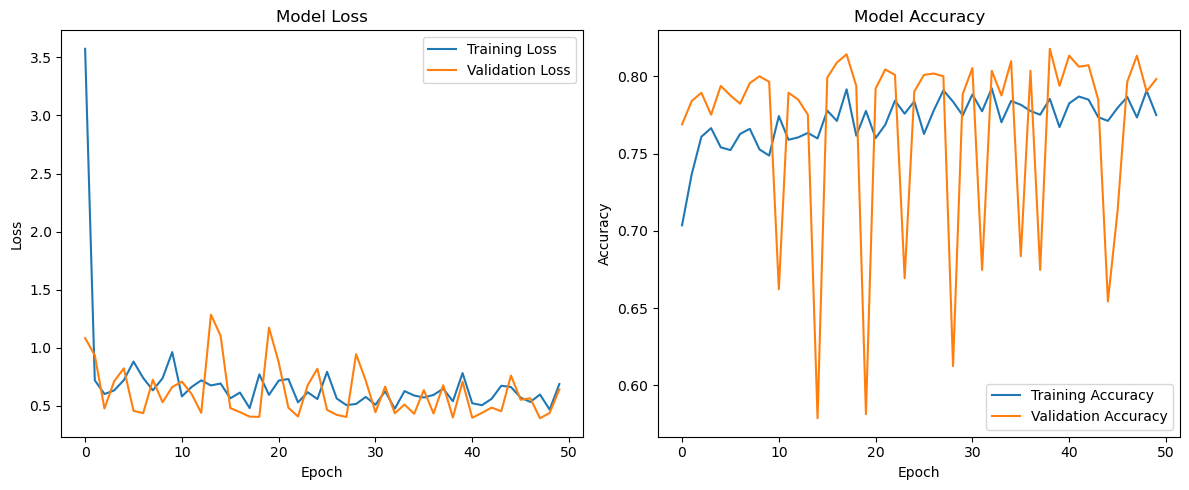

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()